## Steps to Install keras-retinanet library

**Step 1** - Clone repository 

<code>git clone https://github.com/fizyr/keras-retinanet.git</code>

**Step 2** - Compile Library to run the code

<code>python setup.py build_ext --inplace</code>

**Step 3** - Train the model

<code>python keras_retinanet/bin/train.py --batch-size 1 --epochs 1000 --steps 100 csv cell_data.csv class_mapping.csv</code>


**Step 4** - Convert the model to make predictions

<code>python keras_retinanet/bin/convert_model.py ../models/resnet50_csv_02.h5 ../models/model.h5</code>

**Step 5** - Run the code below

In [2]:
%pylab inline


# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import cv2
import os
import time

Populating the interactive namespace from numpy and matplotlib


In [3]:
model = models.load_model('../models/model.h5', backbone_name='resnet50')

/opt/anaconda/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
labels_to_names = {0: 'RBC', 1: 'WBC', 2: 'Platelets'}

processing time:  1.8748512268066406


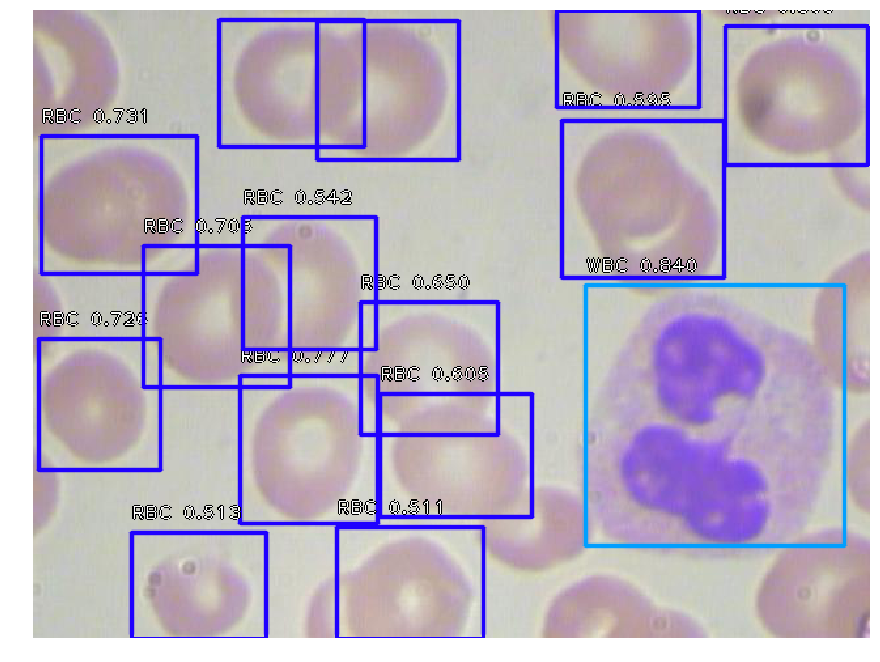

In [5]:
# load image
image = read_image_bgr('../datasets/blood_cell_detection/images/0.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)

image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.50:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()